In [62]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [63]:
"""
Implement the number of vertical and horizontal corners
nb_vertical = ...
nb_horizontal = ...
"""
nb_vertical = 9
nb_horizontal = 6


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('rs/*.png')
assert images


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    """
    Implement findChessboardCorners here
    ret, corners = ...
    """
    ret, corners = cv2.findChessboardCorners(gray, (nb_horizontal, nb_vertical), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        # cv2.imshow('img',img)
        # cv2.waitKey(500)

cv2.destroyAllWindows()

In [64]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv2.imread('rs/left-0000.png')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

(480, 640, 3)


Text(0.5, 1.0, 'Undistorted image')

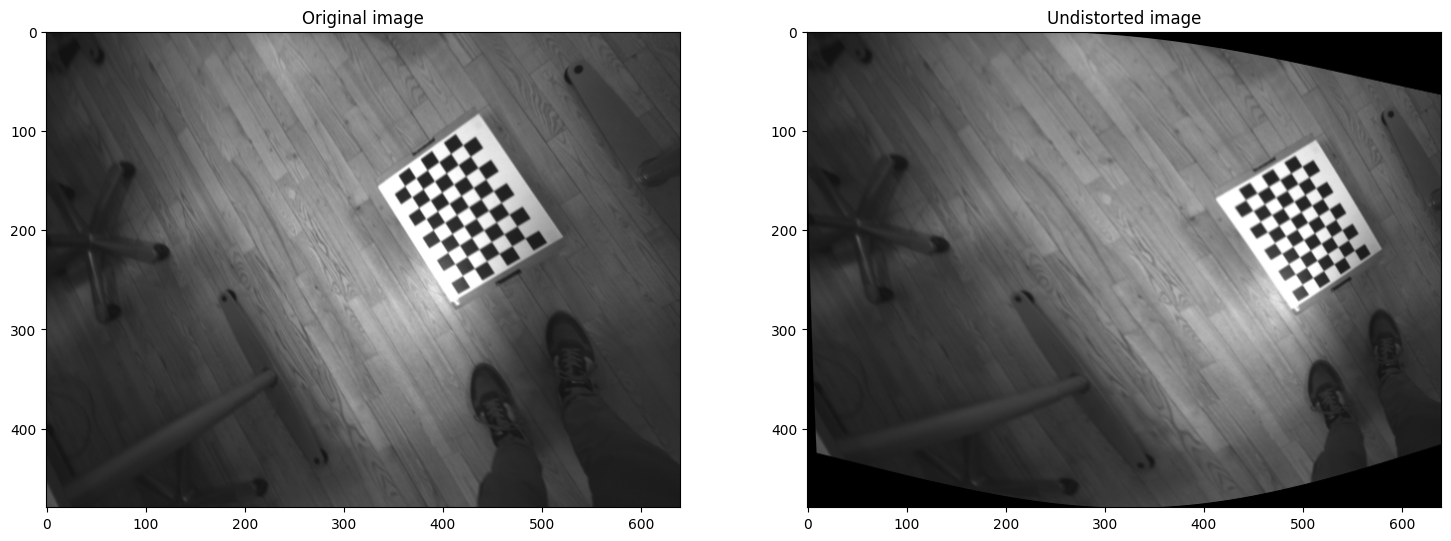

In [174]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

print(dst.shape)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst[...,[2,1,0]])
ax[1].set_title('Undistorted image')

(329, 622, 3)


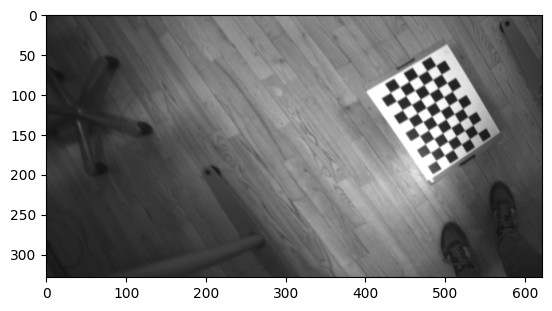

In [171]:
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]

# plt.figure(figsize=(10,10))
# plt.imshow(dst[...,[2,1,0]])
plt.imshow(dst)

In [85]:
left_images_paths = images[:len(images)//2]
right_images_paths = images[len(images)//2:]

print(len(left_images_paths))
print(len(right_images_paths))

print(left_images_paths[0])

76
76
rs/left-0039.png


In [136]:
def open_images(images_path):
    images_container = []
    
    for fname in images_path:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        image_block = []
        
        image_block.append(fname)
        image_block.append(gray)
        
        images_container.append(image_block)
    
    return images_container    

In [157]:
left_images = open_images([left_images_paths[0]])
right_images = open_images(right_images_paths)

In [158]:
print(len(left_images))

print(left_images)

1
[['rs/left-0039.png', array([[35, 36, 35, ..., 38, 36, 36],
       [37, 37, 36, ..., 39, 38, 37],
       [37, 37, 36, ..., 38, 38, 38],
       ...,
       [33, 33, 33, ..., 50, 49, 46],
       [33, 33, 33, ..., 50, 49, 48],
       [33, 34, 33, ..., 50, 48, 49]], dtype=uint8)]]


In [144]:
def undistort_images(images_container, mtx, dist, newcameramtx):
    image_container_dst = []
    
    print(images_container)
    
    for image_block in images_container:
        dst = cv2.undistort(image_block[1], mtx, dist, None, newcameramtx)
        image_block_dst = image_block
        image_block_dst[1] = dst
        image_container_dst.append(image_block_dst)
    return image_container_dst

In [159]:
left_images_dst = undistort_images(left_images, mtx, dist, newcameramtx)
# right_images_dst = undistort_images(right_images, mtx, dist, newcameramtx)

[['rs/left-0039.png', array([[35, 36, 35, ..., 38, 36, 36],
       [37, 37, 36, ..., 39, 38, 37],
       [37, 37, 36, ..., 38, 38, 38],
       ...,
       [33, 33, 33, ..., 50, 49, 46],
       [33, 33, 33, ..., 50, 49, 48],
       [33, 34, 33, ..., 50, 48, 49]], dtype=uint8)]]


(480, 640)


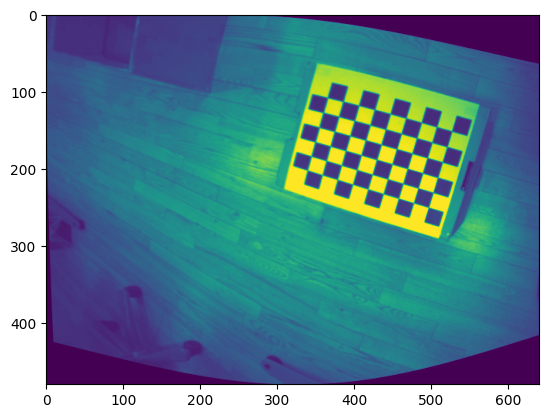

In [164]:
# plt.imshow(left_images_dst[5][1][...,[2,1,0]])
# plt.imshow(left_images_dst[0][1])

img_to_test = left_images_dst[0][1]

print(img_to_test.shape)

plt.imshow(img_to_test, )